In [1]:
import pandas
import matplotlib.pyplot as plt
import scipy.stats as stats
enade2017=pandas.read_csv("MICRODADOS_ENADE_2017.txt", sep=';',dtype={"DS_VT_ESC_OFG": str, 
                                                                               'DS_VT_ESC_OCE':str,
                                                                              'DS_VT_ACE_OCE':str,
                                                                              'NT_GER':str,
                                                                              'NT_FG':str,
                                                                              'NT_OBJ_FG':str,
                                                                              'NT_DIS_FG':str,
                                                                              'NT_CE':str,
                                                                              'NT_OBJ_CE':str,
                                                                              'NT_DIS_CE':str})
enade2017.shape


(537436, 150)

In [2]:
enade2017.columns[0:10]

Index(['NU_ANO', 'CO_IES', 'CO_CATEGAD', 'CO_ORGACAD', 'CO_GRUPO', 'CO_CURSO',
       'CO_MODALIDADE', 'CO_MUNIC_CURSO', 'CO_UF_CURSO', 'CO_REGIAO_CURSO'],
      dtype='object')

In [3]:
'''
nota geral: 0-98 

 QE_I08.
  Qual a renda total de sua família, incluindo seus rendimentos?
  A  (    ) Até 1,5 salário mínimo (até R$ 1.405,50).
  B  (    ) De 1,5 a 3 salários mínimos (R$ 1.405,51 a R$ 2.811,00).
  C  (    ) De 3 a 4,5 salários mínimos (R$ 2.811,01 a R$ 4.216,50).
  D  (    ) De 4,5 a 6 salários mínimos (R$ 4.216,51 a R$ 5.622,00).
  E  (    ) De 6 a 10 salários mínimos (R$ 5. 622,01 a R$ 9.370,00).
  F  (    ) De 10 a 30 salários mínimos (R$ 9.370,01 a R$ 28.110,00).
  G  (    ) Acima de 30 salários mínimos (mais de R$ 28.110,00).
  
  QE_I10.
   Qual alternativa a seguir melhor descreve sua situação de trabalho (exceto estágio ou bolsas)?
   A  (    ) Não estou trabalhando.
   B  (    ) Trabalho eventualmente.
   C  (    ) Trabalho até 20 horas semanais.
   D  (    ) Trabalho de 21 a 39 horas semanais.
   E  (    ) Trabalho 40 horas semanais ou mais. 

'''

tabela17 = pandas.DataFrame(enade2017, columns=['NT_GER', 'CO_CATEGAD', 'CO_UF_CURSO', 'QE_I08', 'QE_I10'])
tabela17.head(10)

,NT_GER,CO_CATEGAD,CO_UF_CURSO,QE_I08,QE_I10
0,"52,6",1,51,B,B
1,"63,1",1,51,B,E
2,"33,7",1,51,F,A
3,"58,1",1,51,B,A
4,"46,3",1,51,F,C
5,"64,2",1,51,C,B
6,"41,4",1,51,C,A
7,"48,8",1,51,C,A
8,"52,9",1,51,E,A
9,"62,7",1,51,C,C


In [4]:
#LIMPEZA DE DADOS 
#substitui vírgula por ponto

tabela17['NT_GER'] = tabela17['NT_GER'].str.replace(',', '.')
tabela17=tabela17.loc[(tabela17['NT_GER'].notnull())]
tabela17['NT_GER'] = pandas.to_numeric(tabela17['NT_GER'])
tabela17.head()

,NT_GER,CO_CATEGAD,CO_UF_CURSO,QE_I08,QE_I10
0,52.6,1,51,B,B
1,63.1,1,51,B,E
2,33.7,1,51,F,A
3,58.1,1,51,B,A
4,46.3,1,51,F,C


In [5]:
tabela17=tabela17.loc[(tabela17['QE_I08'].notnull())]
tabela17=tabela17.loc[(tabela17['QE_I10'].notnull())]

tabela17['QE_I08'] = tabela17['QE_I08'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4,'E': 5, 'F':6,'G':7})
tabela17['QE_I10'] = tabela17['QE_I10'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4,'E': 5})
tabela17.head()

,NT_GER,CO_CATEGAD,CO_UF_CURSO,QE_I08,QE_I10
0,52.6,1,51,2,2
1,63.1,1,51,2,5
2,33.7,1,51,6,1
3,58.1,1,51,2,1
4,46.3,1,51,6,3


In [6]:
tabela17['NT_GER'].mean()

43.61764950278398

In [7]:
tabela17['NT_GER'].describe()

count    442868.000000
mean         43.617650
std          14.061583
min           0.000000
25%          33.500000
50%          43.000000
75%          53.200000
max          98.100000
Name: NT_GER, dtype: float64

In [8]:
print('indice da primeira maior nota 2017: ', tabela17['NT_GER'].idxmax())
print('Maior nota: ', tabela17['NT_GER'][72257])
#print(tabela['NT_GER'].idxmax())

indice da primeira maior nota 2017:  72257
Maior nota:  98.1


In [9]:
#Calcula a media de Minas Gerais

UF17 = tabela17

In [10]:
#UF17['NT_GER'].describe()

In [11]:
#CATEGORIA DA UNIVERSIDADE
#2017
#Pública = 1
#Privada = 2
tabela17 = tabela17.loc[(tabela17['CO_CATEGAD'].notnull())]
tabela17['CO_CATEGAD'] = tabela17['CO_CATEGAD'].map({'1': 1, '2':1, '3':1, '4':2, '5':2})

CAT17Pub = UF17[UF17['CO_CATEGAD']==1]
CAT17Pub.describe()

,NT_GER,CO_CATEGAD,CO_UF_CURSO,QE_I08,QE_I10
count,103027.00000,103027.0,103027.000000,103027.000000,103027.000000
mean,48.10947,1.0,30.987033,2.937754,2.376697
std,14.64374,0.0,10.319677,1.660787,1.636752
min,0.00000,1.0,11.000000,1.000000,1.000000
25%,37.80000,1.0,24.000000,2.000000,1.000000
50%,48.20000,1.0,31.000000,3.000000,1.000000
75%,58.50000,1.0,35.000000,4.000000,4.000000
max,98.10000,1.0,53.000000,7.000000,5.000000


In [12]:
#Privada
CAT17Priv = UF17[UF17['CO_CATEGAD']==2]
CAT17Priv.describe()

,NT_GER,CO_CATEGAD,CO_UF_CURSO,QE_I08,QE_I10
count,50003.000000,50003.0,50003.000000,50003.000000,50003.000000
mean,44.595284,2.0,32.018759,2.501350,2.610763
std,14.427150,0.0,8.880785,1.510431,1.677591
min,0.000000,2.0,13.000000,1.000000,1.000000
25%,34.400000,2.0,26.000000,1.000000,1.000000
50%,44.300000,2.0,33.000000,2.000000,2.000000
75%,54.700000,2.0,35.000000,3.000000,4.000000
max,93.800000,2.0,52.000000,7.000000,5.000000


In [13]:
#somente as notas de quem respondeu a questão sobre a renda
CAT17Priv=CAT17Priv.loc[(CAT17Priv['QE_I08'].notnull())]
CAT17Priv.NT_GER.describe()

count    50003.000000
mean        44.595284
std         14.427150
min          0.000000
25%         34.400000
50%         44.300000
75%         54.700000
max         93.800000
Name: NT_GER, dtype: float64

In [14]:
#somente as notas de quem respondeu a questão sobre a situacao de trabalho
CAT17Priv=CAT17Priv.loc[(CAT17Priv['QE_I10'].notnull())]
CAT17Priv.NT_GER.describe()

count    50003.000000
mean        44.595284
std         14.427150
min          0.000000
25%         34.400000
50%         44.300000
75%         54.700000
max         93.800000
Name: NT_GER, dtype: float64

In [15]:
CAT17Priv.QE_I08.head(10)


5108    4
5109    1
5110    3
5111    4
5112    1
5113    4
5114    6
5115    3
5116    6
5117    4
Name: QE_I08, dtype: int64

In [16]:
CAT17Priv.QE_I10.head(10)

5108    1
5109    1
5110    1
5111    2
5112    1
5113    1
5114    2
5115    1
5116    2
5117    1
Name: QE_I10, dtype: int64

In [17]:
#somente as notas de quem respondeu a questão sobre a situação de trabalho
#2017 publica
CAT17Pub=CAT17Pub.loc[(CAT17Pub['QE_I10'].notnull())]
CAT17Pub.NT_GER.describe()

count    103027.00000
mean         48.10947
std          14.64374
min           0.00000
25%          37.80000
50%          48.20000
75%          58.50000
max          98.10000
Name: NT_GER, dtype: float64

In [18]:
#somente as notas de quem respondeu a questão sobre a renda
CAT17Pub=CAT17Pub.loc[(CAT17Pub['QE_I08'].notnull())]
CAT17Pub.NT_GER.describe()

count    103027.00000
mean         48.10947
std          14.64374
min           0.00000
25%          37.80000
50%          48.20000
75%          58.50000
max          98.10000
Name: NT_GER, dtype: float64

In [19]:
CAT17Pub.QE_I08.head(10)


0    2
1    2
2    6
3    2
4    6
5    3
6    3
7    3
8    5
9    3
Name: QE_I08, dtype: int64

In [20]:
CAT17Pub.QE_I10.head(10)


0    2
1    5
2    1
3    1
4    3
5    2
6    1
7    1
8    1
9    3
Name: QE_I10, dtype: int64

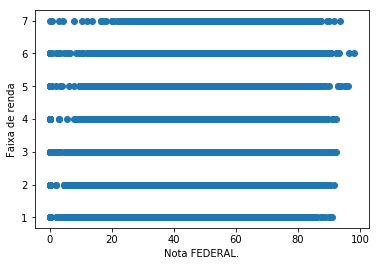

In [21]:
import matplotlib.pyplot as plt
#visualmente
plt.scatter( CAT17Pub.NT_GER, CAT17Pub.QE_I08)
plt.ylabel('Faixa de renda')
plt.xlabel('Nota FEDERAL.')
plt.show()

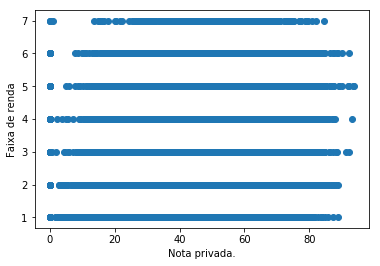

In [22]:
import matplotlib.pyplot as plt
#visualmente
plt.scatter( CAT17Priv.NT_GER, CAT17Priv.QE_I08)
plt.ylabel('Faixa de renda')
plt.xlabel('Nota privada.')
plt.show()

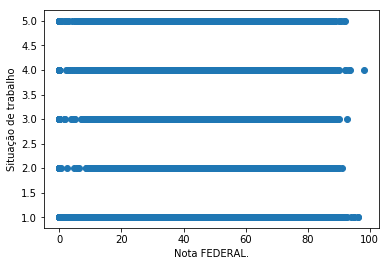

In [23]:
import matplotlib.pyplot as plt
#visualmente
plt.scatter( CAT17Pub.NT_GER, CAT17Pub.QE_I10)
plt.ylabel('Situação de trabalho')
plt.xlabel('Nota FEDERAL.')
plt.show()

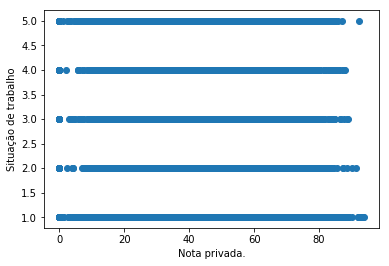

In [24]:
import matplotlib.pyplot as plt
#visualmente
plt.scatter( CAT17Priv.NT_GER, CAT17Priv.QE_I10)
plt.ylabel('Situação de trabalho')
plt.xlabel('Nota privada.')
plt.show()

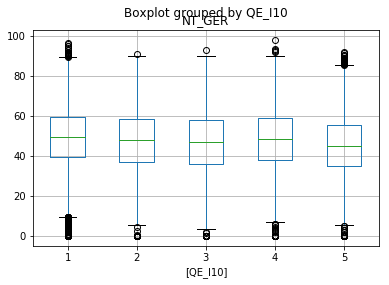

In [25]:
pub10 = pandas.DataFrame(CAT17Pub, columns=['NT_GER', 'QE_I10'])
pub10.boxplot(by='QE_I10')


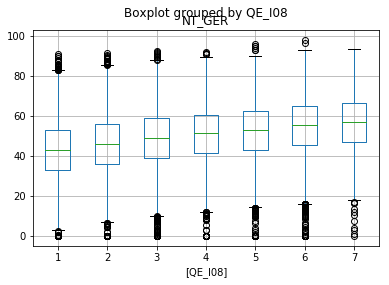

In [26]:
pub08 = pandas.DataFrame(CAT17Pub, columns=['NT_GER', 'QE_I08'])
pub08.boxplot(by='QE_I08')


In [27]:
priv10 = pandas.DataFrame(CAT17Priv, columns=['NT_GER', 'QE_I10'])
priv10.head(10)
#qe22.boxplot(by='QE_I10')


,NT_GER,QE_I10
5108,64.6,1
5109,64.0,1
5110,78.1,1
5111,79.3,2
5112,66.4,1
5113,52.3,1
5114,71.3,2
5115,69.3,1
5116,62.9,2
5117,58.7,1


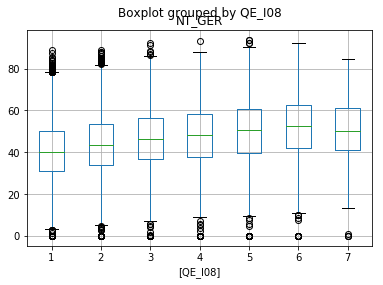

In [28]:
priv08 = pandas.DataFrame(CAT17Priv, columns=['NT_GER', 'QE_I08'])
priv08.boxplot(by='QE_I08')


In [29]:
'''DOS ESTUDANTES DE ESCOLA PÚBLICA QUE TRABALHAM >=40 HORAS POR SEMANA '''
trabalhopub1=pub10.loc[pub10.QE_I10 ==5]
print(trabalhopub1.NT_GER.describe())



count    20390.000000
mean        45.407386
std         14.328866
min          0.000000
25%         35.225000
50%         45.200000
75%         55.400000
max         92.200000
Name: NT_GER, dtype: float64


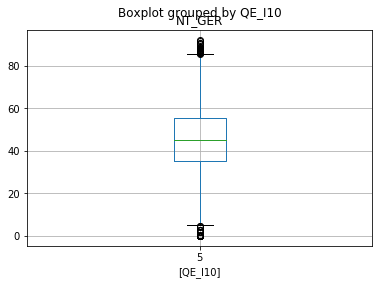

In [30]:
a = pandas.DataFrame(trabalhopub1, columns=['NT_GER', 'QE_I10'])
a.boxplot(by='QE_I10')



In [31]:
'''DOS ESTUDANTES DE ESCOLA PRIVADA QUE TRABALHAM >=40 HORAS POR SEMANA '''
trabalhopriv1=priv10.loc[priv10.QE_I10 ==5]
print(trabalhopriv1.NT_GER.describe())

count    12150.000000
mean        42.766033
std         13.981782
min          0.000000
25%         32.900000
50%         42.300000
75%         52.200000
max         92.300000
Name: NT_GER, dtype: float64


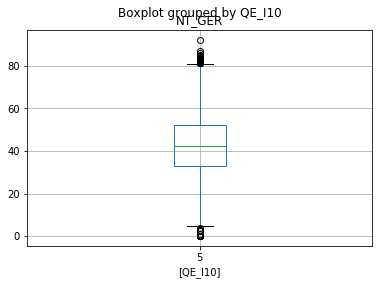

In [32]:
a = pandas.DataFrame(trabalhopriv1, columns=['NT_GER', 'QE_I10'])
a.boxplot(by='QE_I10')

In [33]:
'''DOS ESTUDANTES DE ESCOLA PÚBLICA QUE NAO TRABALHAM '''
trabalhopub2=pub10.loc[pub10.QE_I10 ==1]
print(trabalhopub2.NT_GER.describe())


count    53685.000000
mean        49.321922
std         14.337213
min          0.000000
25%         39.500000
50%         49.500000
75%         59.500000
max         96.400000
Name: NT_GER, dtype: float64


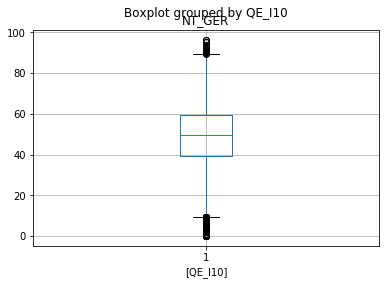

In [34]:
a = pandas.DataFrame(trabalhopub2, columns=['NT_GER', 'QE_I10'])
a.boxplot(by='QE_I10')

In [35]:
'''DOS ESTUDANTES DE ESCOLA PRIVADA QUE NAO TRABALHAM '''
trabalhopriv2=priv10.loc[priv10.QE_I10 ==1]
print(trabalhopriv2.NT_GER.describe())

count    22424.000000
mean        45.904986
std         14.390390
min          0.000000
25%         35.800000
50%         45.850000
75%         56.000000
max         93.800000
Name: NT_GER, dtype: float64


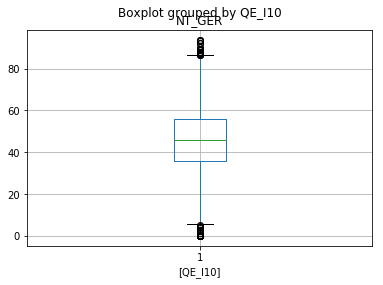

In [36]:
a = pandas.DataFrame(trabalhopriv2, columns=['NT_GER', 'QE_I10'])
a.boxplot(by='QE_I10')

In [37]:
""" DOS ESTUDANTES DE ESCOLA PUBLICA COM A RENDA DE ATÉ 1,5 SALÁRIO MINIMO"""
rendapub1=pub08.loc[pub08.QE_I08 ==1]
print(rendapub1.NT_GER.describe())


count    24055.000000
mean        43.230933
std         14.064832
min          0.000000
25%         33.100000
50%         42.900000
75%         53.100000
max         91.000000
Name: NT_GER, dtype: float64


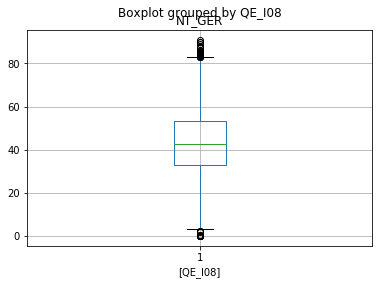

In [38]:
a = pandas.DataFrame(rendapub1, columns=['NT_GER', 'QE_I08'])
a.boxplot(by='QE_I08')

In [39]:
""" DOS ESTUDANTES DE ESCOLA PRIVADA COM A RENDA DE ATÉ 1,5 SALÁRIO MINIMO"""
rendapriv1=priv08.loc[priv08.QE_I08 ==1]
print(rendapriv1.NT_GER.describe())

count    16033.000000
mean        40.797343
std         13.431551
min          0.000000
25%         31.200000
50%         40.300000
75%         50.000000
max         88.700000
Name: NT_GER, dtype: float64


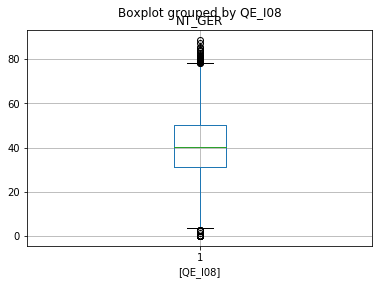

In [40]:
a = pandas.DataFrame(rendapriv1, columns=['NT_GER', 'QE_I08'])
a.boxplot(by='QE_I08')

In [41]:
""" DOS ESTUDANTES DE ESCOLA PUBLICA COM A RENDA DE 6 a 10 SALÁRIOS MINIMOS"""
rendapub2=pub08.loc[pub08.QE_I08 ==5]
print(rendapub2.NT_GER.describe())

count    12732.000000
mean        52.522549
std         14.155338
min          0.000000
25%         43.200000
50%         53.000000
75%         62.525000
max         96.200000
Name: NT_GER, dtype: float64


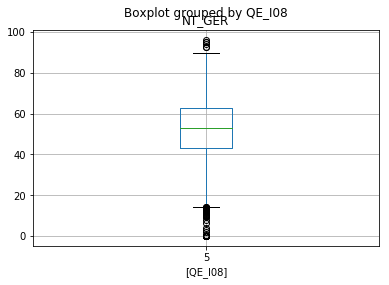

In [42]:
a = pandas.DataFrame(rendapub2, columns=['NT_GER', 'QE_I08'])
a.boxplot(by='QE_I08')

In [43]:
""" DOS ESTUDANTES DE ESCOLA PRIVADA COM A RENDA DE 6 a 10 SALÁRIOS MINIMOS"""
rendapriv2=priv08.loc[priv08.QE_I08 ==5]
print(rendapriv2.NT_GER.describe())

count    4300.000000
mean       49.998349
std        14.757584
min         0.000000
25%        39.900000
50%        50.450000
75%        60.600000
max        93.800000
Name: NT_GER, dtype: float64


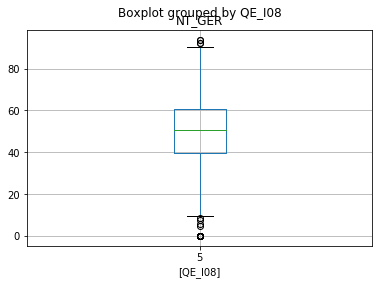

In [44]:
a = pandas.DataFrame(rendapriv2, columns=['NT_GER', 'QE_I08'])
a.boxplot(by='QE_I08')